# Molin Project 2 Kelompok 5
- Aurelio Naufal Effendy (2106638526)
- Rifa Nayaka Utami (2106632163)
- Muhamad Rakan Akmal (2106635745)
- Musarrofah Kurnia (2106652543)
- Shafiyah Audiva Yasmin (2106706880)

Data yang digunakan adalah Small dataset about used Fiat 500 sold in Italy, 

sumber: https://www.kaggle.com/datasets/paolocons/small-dataset-about-used-fiat-500-sold-in-italy?resource=download

Tujuannya adalah untuk memprediksi harga jual mobil bekas Fiat 500 dengan menerapkan model regresi linier.

# LOAD DATA

Import modules yang akan dibutuhkan

In [1]:
#import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Load data dari Github

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rakanakml17/molinproject2group5/main/Used_fiat_500_in_Italy_dataset.csv')

In [3]:
print('Head Dataset')
df.head()

Head Dataset


,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [4]:
print("Tipe Data:", type(df))

print("\nKeterangan Dataset")
print(df.info())

print("\nHead Dataset")
df.head()

Tipe Data: <class 'pandas.core.frame.DataFrame'>

Keterangan Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB
None

Head Dataset


,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


Dapat dilihat, datanya lengkap, tidak ada missing values.

Didapatkan juga dari data terdapat 380 subjek dengan 9 variabel, yakni =
1. model [tipe data : object/category]
2. engine_power [tipe data : object/category]
3. transmission [tipe data : float]
4. age_in_days [tipe data : integer]
5. km [tipe data : integer]
6. previous_owners [tipe data : integer]                         
7. lat [tipe data : integer]                       
8. lon [tipe data : integer]
9. price [tipe data : integer] (variabel target)     

Dengan penjelasan dari masing-masing variabel =
1. Model = model dari mobil Fiat 500, terdapat 4 jenis kategori, yakni 'pop', 'lounge', 'star' dan 'sport'.
2. Engine power = kekuatan mesin (besar horsepower)
3. Transmission = transmisi mobil, terdiri dari 2 jenis kategori yakni, 'manual' dan 'automatic'
4. Age in days = umur dari mobil dalam hari
5. km = jarak kilometer yang telah ditempuh mobil
6. Previous owners = jumlah kepemilikan mobil sebelumnya
7. Latitude = koordinat lintang lokasi penjual   
8. Longitude = koordinat bujur lokasi penjual
9. Price = harga jual mobil dalam mata uang euro

# Exploratory Data Analysis & PreProcessing

**Data Understanding**

Mengecek atribut variabel kategorik

In [5]:
df.describe(include=[object])

,model,transmission
count,380,380
unique,4,2
top,lounge,manual
freq,212,355


Melakukan plotting dengan violin plot untuk melihat persebaran dari atribut variabel kategorik

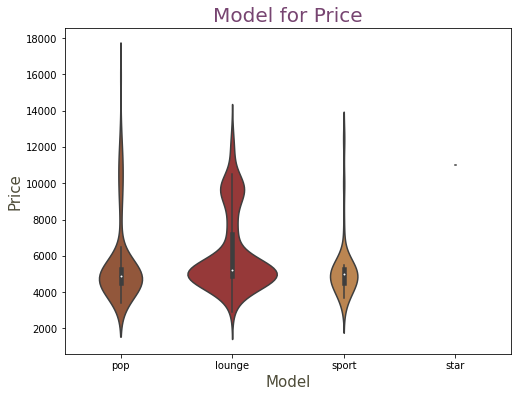

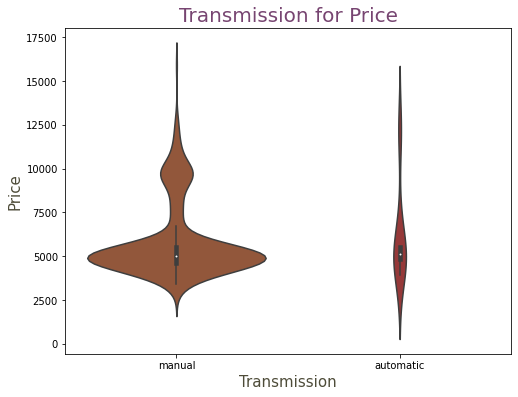

In [6]:
plt.figure(figsize=(8,6))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="model",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Model for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Model", color="#4e4c39", fontsize = 15)
plt.show()

plt.figure(figsize=(8,6))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="transmission",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Transmission for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Transmission", color="#4e4c39", fontsize = 15)
plt.show()

Melihat persebaran data dengan beberapa jenis plot untuk variabel kategori model mobil

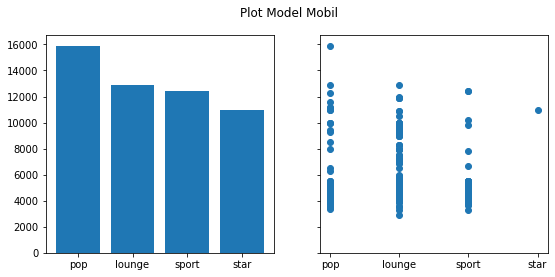

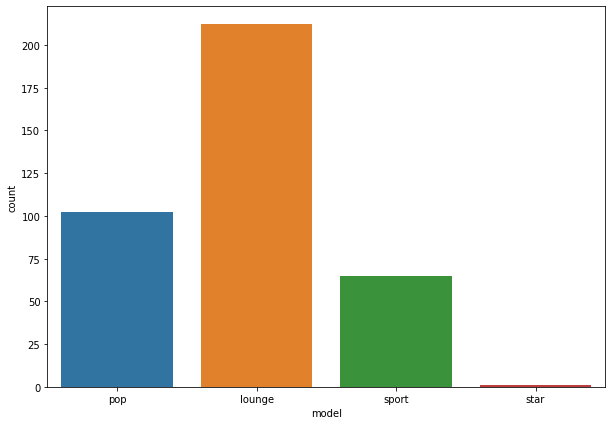

In [7]:
models = list(df['model'])
values = list(df['price'])

fig, axs = plt.subplots(1, 2, figsize=(9,4), sharey=True)
axs[0].bar(models, values)
axs[1].scatter(models, values)
fig.suptitle('Plot Model Mobil')

countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'model', data=df)

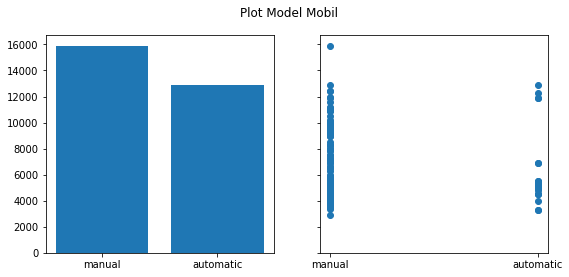

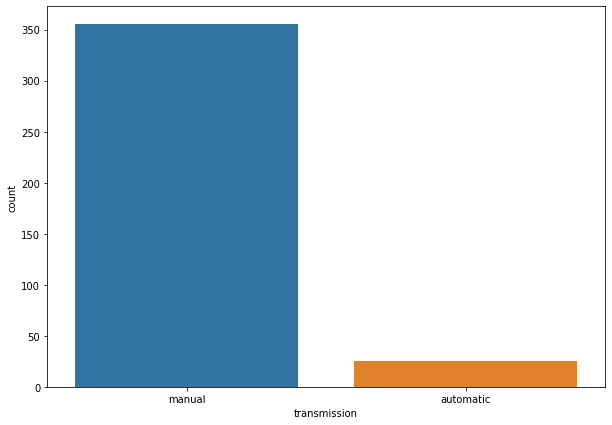

In [8]:
transmissions = list(df['transmission'])
values = list(df['price'])

fig, axs = plt.subplots(1, 2, figsize=(9,4), sharey=True)
axs[0].bar(transmissions, values)
axs[1].scatter(transmissions, values)
fig.suptitle('Plot Model Mobil')

countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'transmission', data=df)

Diperoleh dari visualisasi grafik tersebut bahwa :
1. Model mobil yang paling banyak ditemukan dalam data adalah model 'lounge' dan yang paling sedikit adalah 'star' dengan persebaran harga dibanding model yang cukup mirip, namun di model mobil 'lounge' cukup banyak juga berkisar di harga 1000 euro. 
2. Jenis transmisi mobil yang paling banyak ditemukan di dalam data adalah 'manual', dengan rata-rata berkisar di harga 5000 euro.

Mengecek atribut variabel numerik 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_power,380.0,73.015789,9.984672,69.000000,69.000000,69.000000,69.000000,101.000000
age_in_days,380.0,3310.265789,1437.555063,91.000000,3097.250000,3927.000000,4322.000000,4719.000000
km,380.0,102196.250000,47115.355234,4981.000000,76611.750000,112000.000000,135000.000000,259000.000000
previous_owners,380.0,1.510526,0.560244,1.000000,1.000000,1.000000,2.000000,4.000000
lat,380.0,44.257712,1.767518,37.510872,43.514196,45.069679,45.556942,46.781651
lon,380.0,10.742644,2.167753,7.320720,9.159140,10.301505,12.346788,18.168011
price,380.0,5881.655263,2170.617946,2890.000000,4600.000000,5000.000000,5500.000000,15900.000000


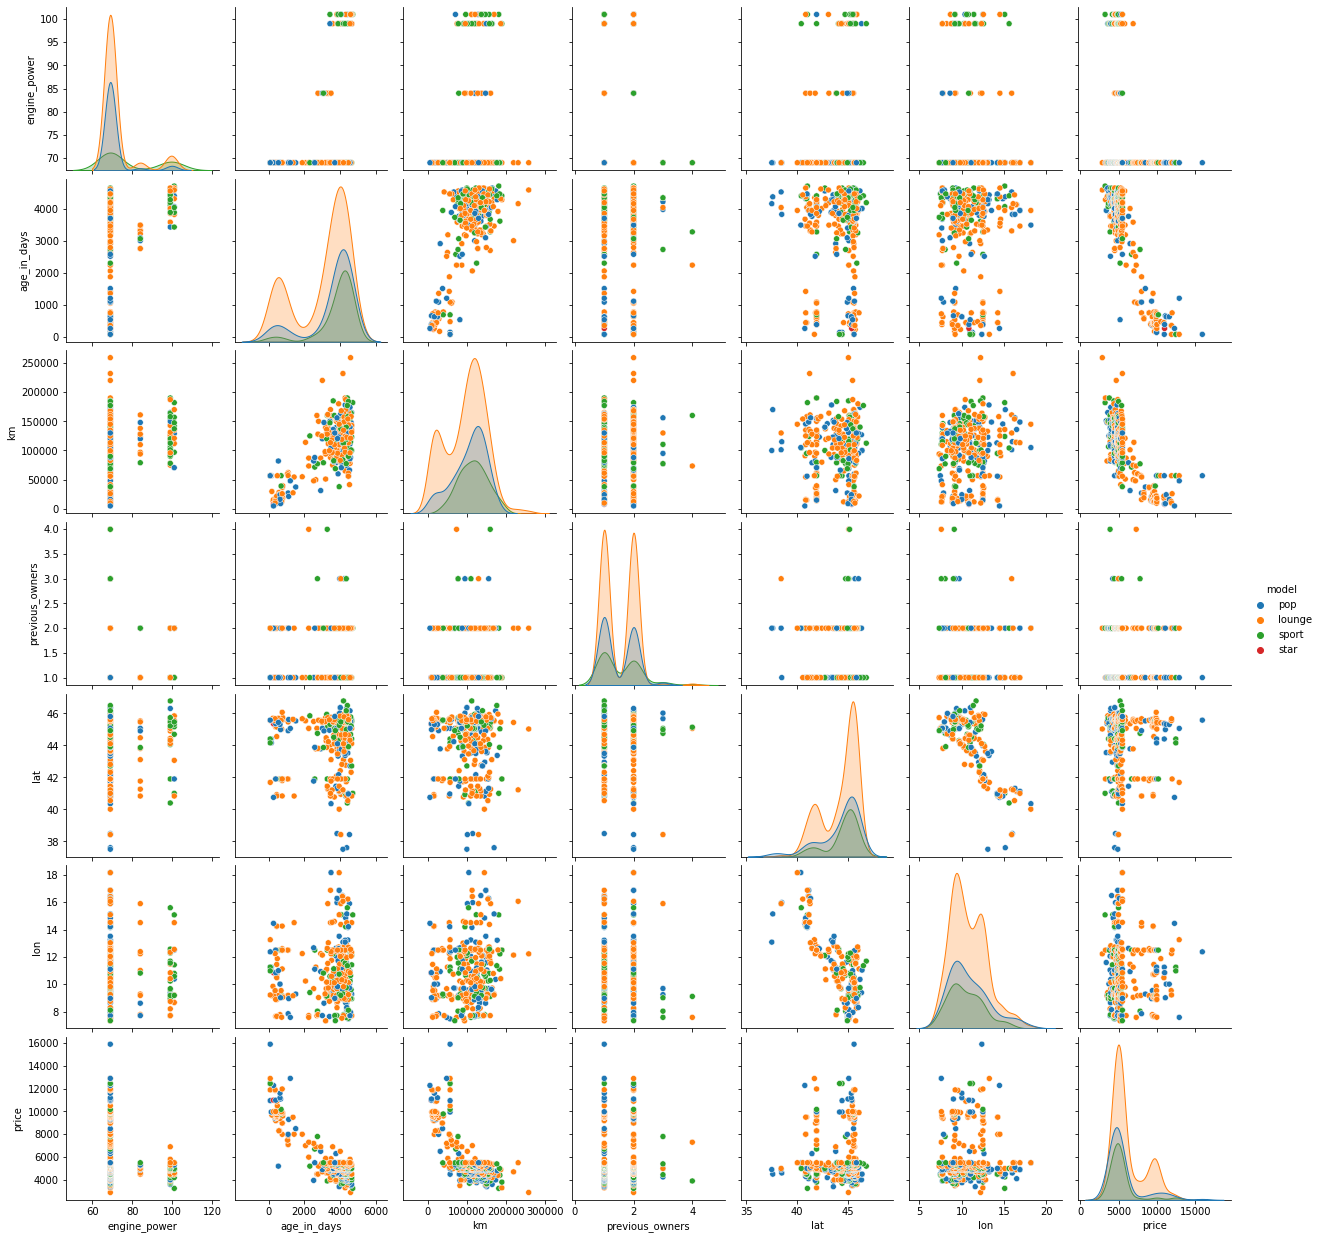

In [10]:
ax = sns.pairplot(df, hue= "model")

Diperoleh statistik dari variabel numerik tersebut. Serta dari pairplot dapat dilihat bahwa 'price' atau harga yang merupakan variabel yang akan kita prediksi mempunyai grafik yang right skewed (memiliki lebih banyak data di kiri).

Kemudian, kita juga dapat mengecek outlier yang mungkin ada dari data tersebut dengan membuat scatterplot antara setiap variabel numerik dengan variabel price ssebagai variabel target.

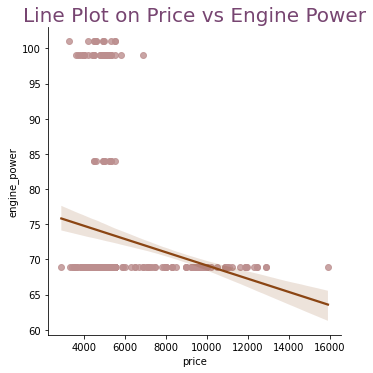

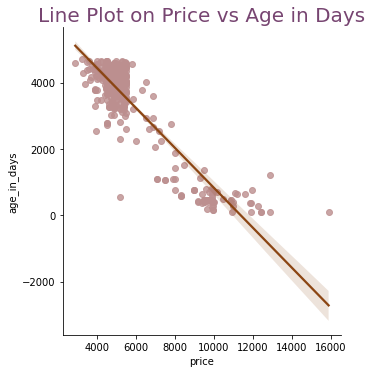

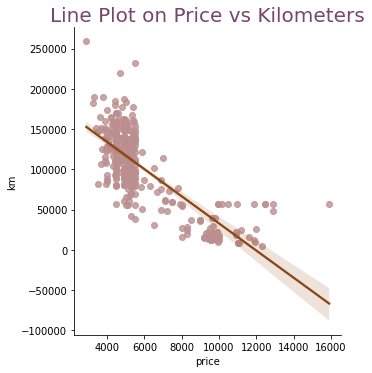

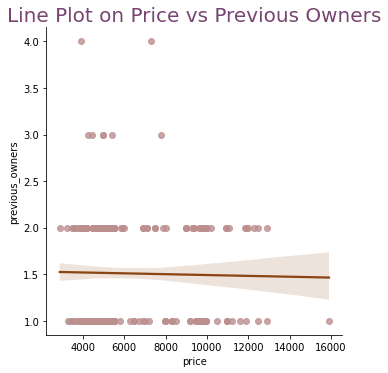

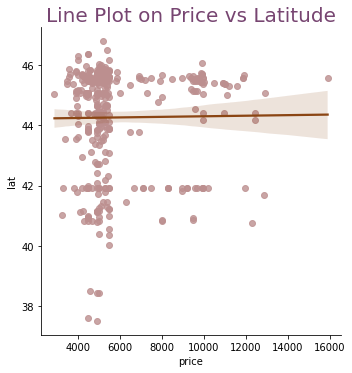

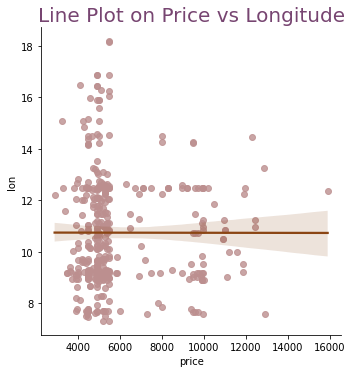

In [11]:
lm = sns.lmplot(x="price", y="engine_power", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Engine Power", color="#774571", fontsize = 20)

lm = sns.lmplot(x="price", y="age_in_days", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Age in Days", color="#774571", fontsize = 20)

lm = sns.lmplot(x="price", y="km", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Kilometers", color="#774571", fontsize = 20)

lm = sns.lmplot(x="price", y="previous_owners", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Previous Owners", color="#774571", fontsize = 20)

lm = sns.lmplot(x="price", y="lat", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Latitude", color="#774571", fontsize = 20)

lm = sns.lmplot(x="price", y="lon", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs Longitude", color="#774571", fontsize = 20)

plt.show()

Dari grafik di atas terlihat beberapa outlier dari masing-masing variabel. Data yang menjadi outlier sebetulnya tidak merusak pesebaran data secara krusial dan juga data tersebut masih valid dalam observasi.

Karena kita akan memprediksi harga ('price'), maka akan dicoba untuk melihat persebaran data dari price dan boxplotnya

(array([ 33., 240.,  26.,  16.,  11.,  36.,  12.,   5.,   0.,   1.]),
 array([ 2890.,  4191.,  5492.,  6793.,  8094.,  9395., 10696., 11997.,
        13298., 14599., 15900.]),
 <a list of 10 Patch objects>)

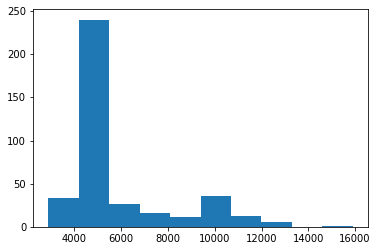

In [12]:
plt.hist(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4feb954bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4feb8e22b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4feb954850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4feb8e2970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4feb8e2c70>],
 'means': []}

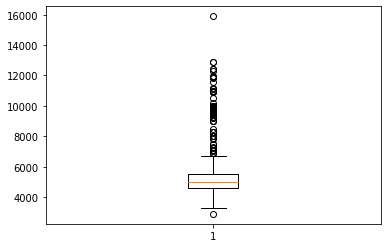

In [13]:
plt.boxplot(df['price'])

Dapat dilihat dari boxplot tersebut bahwa ada outlier dimana harga jualnya sangat tinggi sendiri mencapai 16000 euro dan sebenarnya ada juga outlier yang dibawah 3000 euro (namun tidak kita masukkan sebagai outlier karena masih dekat dengan boxplot). Outlier tersebut dapat kita lihat sebagai berikut.

In [14]:
outliers = df[df['price'] > 14000]
outliers.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
97,pop,69,manual,91,56779,1,45.580879,12.36937,15900


In [15]:
#Karena outlier tersebut tersebar cukup jauh dan hanya ada 1 observasi, maka Kita dapat menghilangkan/mendrop nilai tersebut
df_preprop = df.drop(outliers.index)

In [16]:
df_preprop.shape
#mengecek bahwa outlier tersebut sudah dihapus dalam data yang baru (berkurang 1 dari yang sebelumnya 380)

(379, 9)

Selanjutnya untuk memudahkan dalam membuat model, variabel yang sebelumnya dalam bentuk objek akan diubah menjadi variabel kategorik

In [17]:
df_preprop['model'] = df_preprop['model'].astype('category')
df_preprop['transmission'] = df_preprop['transmission'].astype('category')

Kemudian, karena koordinat bujur dan lintang adalah variabel yang perlu digabungkan untuk memiliki pengaruh (yang berarti) dalam model, kami akan menghapusnya untuk kasus ini

In [18]:
df_preprop = df_preprop.drop(labels = ['lon', 'lat'], axis =1)
df_preprop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 379
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   model            379 non-null    category
 1   engine_power     379 non-null    int64   
 2   transmission     379 non-null    category
 3   age_in_days      379 non-null    int64   
 4   km               379 non-null    int64   
 5   previous_owners  379 non-null    int64   
 6   price            379 non-null    int64   
dtypes: category(2), int64(5)
memory usage: 18.8 KB


In [19]:
# karena model ML hanya menerima int atau float. Jadi, akan menggunakan dummy variabel untuk mengubah variabel kategorik tersebut menjadi int suopaya dapat digunakan dalam membuat model.
# Dengan Melakukan dummy encoding akan dibentuk df_preprop 
df_preprop_dummy = pd.get_dummies(df_preprop)
df_preprop_dummy.tail()

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport,model_star,transmission_automatic,transmission_manual
375,69,4474,55976,2,5500,1,0,0,0,0,1
376,69,4200,134717,1,5500,1,0,0,0,0,1
377,69,3470,113344,1,5500,1,0,0,0,0,1
378,69,3712,130000,1,5500,0,1,0,0,1,0
379,99,4566,96000,1,5500,1,0,0,0,0,1


In [20]:
# Untuk mengakomodir pembuatan model dalam regresi, dibentuk juga dummy variabel untuk n-1 kategori

df_preprop_dummies = df_preprop.copy()

df_preprop_dummies['model_lounge'] = np.where(df_preprop_dummies['model']=='lounge', 1, 0)
df_preprop_dummies['model_pop'] = np.where(df_preprop_dummies['model']=='pop', 1, 0)
df_preprop_dummies['model_sport'] = np.where(df_preprop_dummies['model']=='sport', 1, 0)
df_preprop_dummies['transmission_manual'] = np.where(df_preprop_dummies['transmission']=='manual', 1, 0)

df_preprop_dummies = df_preprop_dummies.drop(labels = ['model', 'transmission'], axis =1)

df_preprop_dummies.tail()

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport,transmission_manual
375,69,4474,55976,2,5500,1,0,0,1
376,69,4200,134717,1,5500,1,0,0,1
377,69,3470,113344,1,5500,1,0,0,1
378,69,3712,130000,1,5500,0,1,0,0
379,99,4566,96000,1,5500,1,0,0,1


In [21]:
df_preprop_dummy.info()
df_preprop_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 379
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   engine_power            379 non-null    int64
 1   age_in_days             379 non-null    int64
 2   km                      379 non-null    int64
 3   previous_owners         379 non-null    int64
 4   price                   379 non-null    int64
 5   model_lounge            379 non-null    uint8
 6   model_pop               379 non-null    uint8
 7   model_sport             379 non-null    uint8
 8   model_star              379 non-null    uint8
 9   transmission_automatic  379 non-null    uint8
 10  transmission_manual     379 non-null    uint8
dtypes: int64(5), uint8(6)
memory usage: 20.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 379
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               -----

In [22]:
# mensave data setelah dipreprocessing
df_preprop.to_csv('data_preprop.csv', index=False)
df_preprop_dummy.to_csv('data_preprop_dummy.csv', index=False) # data yang telah dilakukan dummy encoding
df_preprop_dummies.to_csv('data_preprop_dummies.csv', index=False) # data yang telah dilakukan dummy encoding

Visualisasi Data

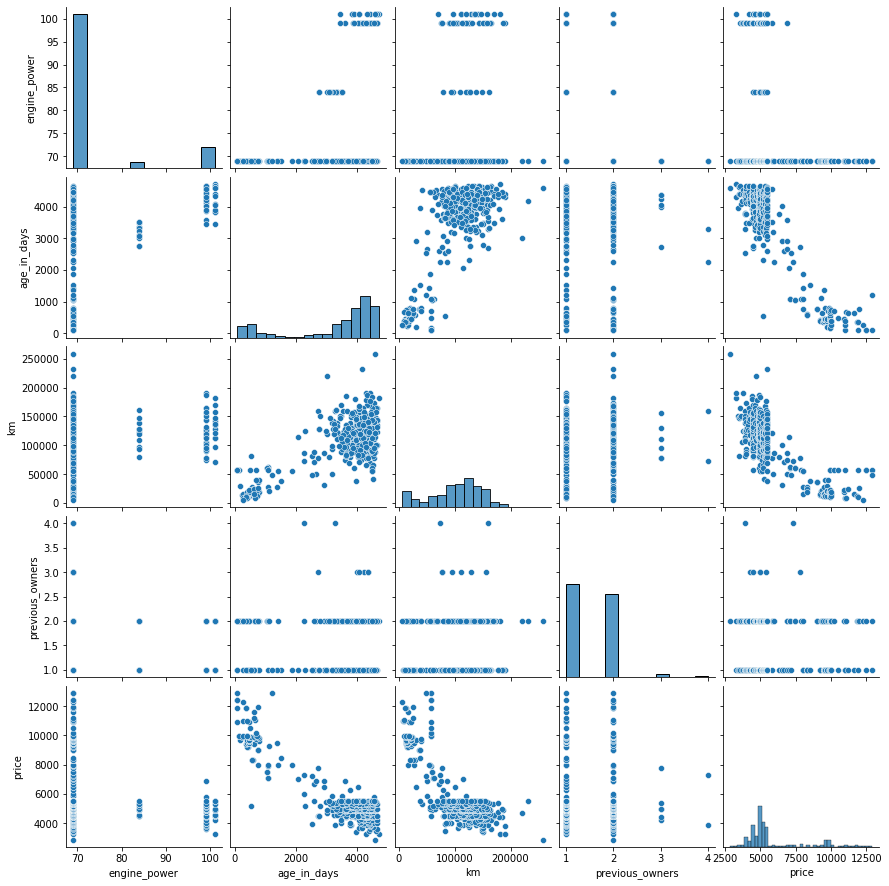

In [23]:
# Visualisasi pairplot
sns.pairplot(df_preprop)

Dari pairplot di atas, dapat dilihat distribusi atribut tunggal dan hubungan dua atribut data.

<Figure size 576x360 with 0 Axes>

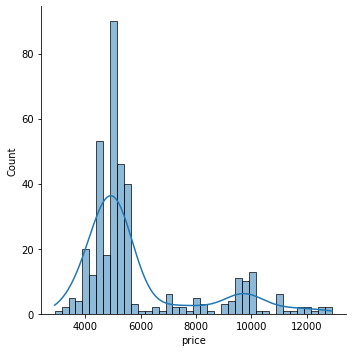

In [24]:
plt.figure(figsize=(8,5))
sns.displot(df_preprop['price'], bins=40, kde=True)

Dari visualisasi tersebut, dapat dilihat distribusi atau sebaran harga jual mobil setelah dilakukan preprocessing. Distribusinya masih memiliki sifat yang sama seperti sebelum di preprocessing yakni right skewed (memiliki lebih banyak data di kiri).

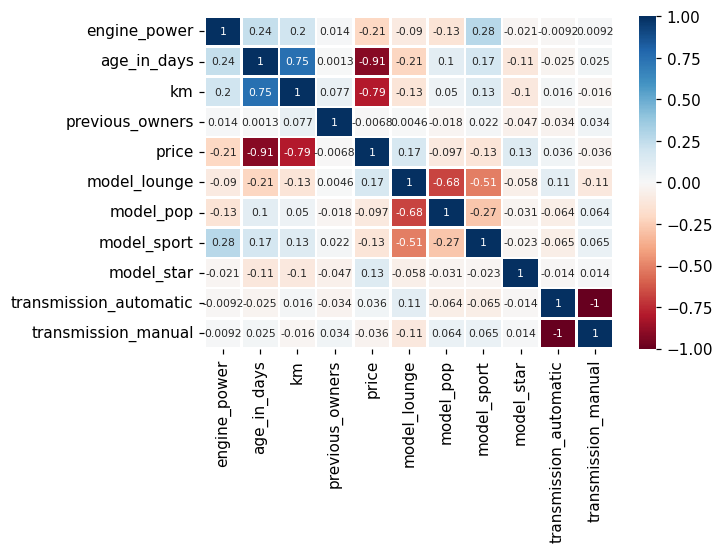

In [25]:
#Heatmap setelah di preprocessing (melihat korelasi antar variabel)
plt.figure(dpi=110)
sns.heatmap(df_preprop_dummy.corr(), linewidths=1,cmap="RdBu",annot=True, annot_kws={'size':7})

In [26]:
abs(df_preprop_dummy.corr()['price']).sort_values()[::-1][:11]

price                     1.000000
age_in_days               0.912773
km                        0.789244
engine_power              0.205478
model_lounge              0.171268
model_sport               0.129281
model_star                0.125253
model_pop                 0.096627
transmission_manual       0.036481
transmission_automatic    0.036481
previous_owners           0.006827
Name: price, dtype: float64

Berdasarkan visualisasi dan analisis data setelah preprocessing tersebut, beberapa informasi yang didapat :

- Terdapat korelasi negatif sebesar (0.91) antara umur mobil bekas dengan harga jual mobil bekas. Semakin muda umur dari mobil bekas, semakin mahal harga jual mobil bekas, begitu juga sebaliknya.
- Terdapat korelasi negatif sebesar (0.79) antara jumlah kilometer yang telah ditempuh dengan harga jual mobil bekas. Semakin rendah jumlah kilometer, semakin mahal harga jual mobil bekas, begitu juga sebaliknya.
- Sedangkan untuk kekuatan mesin, model, transmisi mobil, dan jumlahh kepemilikan mobil korelasinya terhhadap harga jual mobil kecil, sehingga tidak terlalu berpengaruh pada harga jual mobil.
- Pesebaran data akan lebih terpusat untuk harga mobil bekas yang cenderunng murah, selain dari faktor kelas ekonomi suatu negara, dikarenakan dalam rentang harga mobil tersebut mayoritas orang-orang akan lebih tertarik melakukan pembelian mobil bekas.
- Kedua variabel kategori (model & transmisi) yang dibentuk dummy variabelnya tidak terlalu mempengaruhi harga jual mobil bekas.
- Bannyak variabel yang memiliki nilai korelasi yang kecil, sehingga ketika akan melakukan pemodelan, variabel tersebut berkemungkinan besar tidak signifikan secara statistik (*not statistically significant*).



